# **PCA и t-SNE, или зачем понижать размерность?**

✍ В предыдущих юнитах мы работали преимущественно в двухмерном или трёхмерном пространстве. Наши объекты описывались двумя или тремя признаками. Однако зачастую в реальных задачах объекты описываются куда большим числом признаков, а значит, работать приходится в многомерном пространстве, которое **невозможно визуализировать**.

Трудности могут возникнуть, если:

* нужно визуализировать результаты кластеризации, а пространство признаков многомерное.
* нужно обучить модель, а объект описывается большим количеством признаков. Эти признаки могут быть избыточными или * малоинформативными, что приведёт к плохим результатам при обучении модели.

Избежать этих проблем поможет **снижение размерности данных**.

Мы встречались с уменьшением размерности ранее, например когда рассматривали спектральную кластеризацию. В данном юните мы поближе познакомимся с тем, как работают алгоритмы снижения размерности, рассмотрим такие техники, как **PCA**и **t-SNE**.
***

**Задача снижения размерности** — это задача ***преобразования данных с целью уменьшения количества признаков***, которые описывают объект.
***
Как вы можете догадаться, при уменьшении количества признаков мы теряем часть информации. Например, на изображении ниже Губка Боб после уменьшения размерности стал описываться меньшим количеством признаков и поэтому стал выглядеть по-другому.

![](https://lms.skillfactory.ru/assets/courseware/v1/ddeecaa223adcc2c8d9bb9c47af53711/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_1.png)

Методы снижения размерности могут преобразовывать данные двумя способами:

* **линейно**,
* **нелинейно**.

***
## **PCA (Principal Components Analysis)**

* **Метод главных компонент, или PCA (Principal Components Analysis)** — это один из базовых способов уменьшения размерности.
***
Данный метод имеет широкое применение:

* **Подавление шума на изображениях**.

    *Изображение состоит из пикселей, которые можно рассматривать как набор точек в многомерном пространстве. С помощью метода снижения размерности PCA можно преобразовать этот набор точек и оставить только первые компоненты, полученные после преобразования. В этих компонентах будет содержаться основная информация об изображении, но не будет шума. Таким образом мы улучшим качество изображения.*

Качество картинки с шумом и без него:

![](https://lms.skillfactory.ru/assets/courseware/v1/1647c924d3ef6c9263ad4db04db6473b/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_2.png)

* **Индексация видео для быстрого поиска по базе**.

    *Каждый кадр видео можно преобразовать с помощью PCA и представить несколькими значениями. Далее эти значения легко хранить и искать в базе.*

***

Для уменьшения размерности метод главных компонент проводит *линейное преобразование пространства*, которое *сохраняет длины векторов*. Таким образом происходит *отображение признаков в новое пространство с меньшей размерностью*.

В новом пространстве появляются новые оси. Они строятся таким образом, что для первой оси дисперсия данных должна быть максимальной, а вторая ось ортогональна первой и имеет максимально возможную дисперсию.

Первой главной компонентой будет называться первая ось в новом пространстве.

Например, если у нас есть данные о полученных студентами баллах на экзаменах по двух предметам, мы можем визуализировать эти данные в 2D-пространстве, где по оси x будут баллы по одному предмету, а по оси y — по второму:

![](https://lms.skillfactory.ru/assets/courseware/v1/9461e292832593b85fb7d5d6d308815f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_3.png)

Далее мы вводим две новые оси, которые являются линейными комбинациями предыдущих. Ось PC1 проходит через максимальную дисперсию данных и является суммой исходных осей, а ось PC2 является разницей двух исходных осей, перпендикулярна первой оси и тоже проходит через максимальную оставшуюся дисперсию:

![](https://lms.skillfactory.ru/assets/courseware/v1/c4e407134da9be141f2c53bafc81a2a5/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_4.png)

Таким образом, мы получили первую главную компоненту и вторую компоненту. При этом первая компонента несёт в себе максимум информации о данных, а в каждой последующей компоненте информации всё меньше.
***

Рассмотрим, как запустить PCA с помощью библиотеки sklearn:

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv("data/airbnb.csv")
X = df[['latitude', 'longitude', 'price']]

# из модуля decomposition библиотеки sklearn импортируем класс PCA
from sklearn.decomposition import PCA
# создаём объект класса PCA
# n_components — задаём количество компонентов для проведения трансформации
pca = PCA(n_components=1, random_state=42)
# обучаем модель на данных X
pca.fit(X)
# применяем уменьшение размерности к матрице X
pca.transform(X)


# Также мы можем сразу обучить модель и применить трансформацию уменьшения размерности:
pca.fit_transform(X)

array([[ 3.67143086e+00],
       [ 7.96714289e+01],
       [ 4.67142547e+00],
       [-5.63285706e+01],
       [-6.53285740e+01],
       [ 5.46714286e+01],
       [-8.53285708e+01],
       [-6.63285710e+01],
       [-6.63285729e+01],
       [ 4.67143032e+00],
       [-1.03285731e+01],
       [-6.03285708e+01],
       [-5.63285687e+01],
       [-6.03285731e+01],
       [-2.53285693e+01],
       [-5.32857155e+00],
       [ 6.96714297e+01],
       [-5.32857007e+00],
       [-4.63285711e+01],
       [ 4.46714261e+01],
       [ 1.53671428e+02],
       [-1.53285696e+01],
       [-6.53285695e+01],
       [-3.53285695e+01],
       [-2.53285717e+01],
       [-8.53285690e+01],
       [-6.53285766e+01],
       [ 4.67142881e+00],
       [-1.01328577e+02],
       [ 3.46714296e+01],
       [-9.53285742e+01],
       [-9.33285738e+01],
       [-9.03285726e+01],
       [-9.53285740e+01],
       [-7.53285708e+01],
       [-5.63285687e+01],
       [-1.10328571e+02],
       [-6.03285727e+01],
       [ 4.6

Теперь рассмотрим работу с PCA на практике. Из датасетов sklearn импортируем датасет MNIST — это данные, основанные на рукописном начертании цифр:

![](https://lms.skillfactory.ru/assets/courseware/v1/5062fc991b04b9fcab5cc4842130eff1/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_5.png)

Для данного датасета обучим модель, которая по пикселям изображения предсказывает, что за цифра на нём изображена. Первой мы разработаем модель, которая будет учитывать все признаки, а затем уменьшим размерность данных с помощью PCA и ещё раз обучим модель. Далее мы сравним качество полученных моделей и время, которое было затрачено на обучение в каждом случае.

В датасете MNIST представлено 70 000 изображений, каждое из которых описывается 784 признаками.

In [5]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

Посмотрим, сколько признаков описывало объект до и после уменьшения размерности. Как мы можем заметить, сначала было 787 признаков, а в конце объект описывают уже 300 главных компонент:

In [6]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


Обучим модель логистической регрессии, которая на вход будет принимать пиксели изображения и предсказывать, что на нём нарисовано.

Напишем функцию, которая будет принимать на вход данные для обучения (матрицу с признаками и правильные ответы) и данные для тестирования модели, а на выходе будет возвращать время, затраченное на обучение модели, и качество модели. В качестве метрики оценивания качества будем использовать метрику accuracy.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 64.89824628829956, метрика модели 0.9247142857142857
Модель, построенная на всех исходных признаках. Время обучения 157.3772487640381, метрика модели 0.9187142857142857


Как видим, в данном случае мы потратили на обучение модели в два раза меньше времени, а качество осталось практически таким же.

В реальной работе бывает гораздо больше данных и на обучение модели уходит отнюдь не две минуты. Таким образом, применив технику уменьшения размерности, можно существенно сэкономить время.

→ Мы научились ускорять обучение моделей с помощью понижения размерности данных, а теперь давайте научимся визуализировать многомерное пространство.

***
## **T-SNE (t-distributed Stochastic Neighbor Embedding)**

Для того чтобы визуализировать многомерное пространство признаков, необходимо уменьшить его размерность до двухмерного или трёхмерного. В этом поможет **t-SNE (t-distributed Stochastic Neighbor Embedding)**, что переводится с английского как **«стохастическое вложение соседей с t-распределением»**. 

t-SNE, в отличие от PCA, использует технику нелинейного снижения размерности данных. Обычно используется снижение размерности многомерного пространства до двух- или трёхмерного с целью дальнейшей визуализации. При преобразовании похожие объекты оказываются рядом, а непохожие — далеко друг от друга.

Рассмотрим t-SNE на примере понижения размерности двухмерного пространства до одномерного.

Если у нас есть такое распределение точек, как на графике ниже,

![](https://lms.skillfactory.ru/assets/courseware/v1/e6d300fb54414bcd05e364f6ce62ffce/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_6.png)

то, казалось бы, чтобы уменьшить размерность данных, нужно просто спроецировать эти точки на ось x:

![](https://lms.skillfactory.ru/assets/courseware/v1/29b66c7ec51b91ac3d91401985536ccc/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_7.png)

Но, как мы видим, розовый и синий кластеры перестают быть различными кластерами, когда мы проецируем данные на ось X — данные перемешались. t-SNE позволяет не допускать такого.

**Алгоритм состоит из следующих шагов:**

1. ***В исходном многомерном пространстве для каждого объекта из датасета рассчитываем евклидово расстояние между объектами. Далее с помощью нормального распределения попарно сравниваем объекты датасета. На основе этих значений строится матрица, которая содержит значения схожести объектов:***

![](https://lms.skillfactory.ru/assets/courseware/v1/41c59b2b4cd805a173d56760c9d90919/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_8.png)

    На рисунке выше показано, как для одной точки рассчитали расстояние до всех других точек датасета, далее получили схожесть объектов с помощью нормального распределения и построили матрицу. На данной матрице по строкам и столбцам находятся объекты датасета, а в ячейках — значения схожести двух объектов. Красным обозначена похожесть объекта на самого себя (в таком случае это значение максимально), а розовым — объекты, которые имеют большую схожесть.

2. ***На втором шаге мы уменьшаем размерность данных. Здесь мы случайным образом проецируем объекты из двухмерного пространства на ось x. Далее, как и на первом шаге, мы считаем схожесть объектов в новом пространстве, но для подсчёта используем не нормальное распределение, а t-распределение. После этого строим матрицу попарной схожести объектов:***

![](https://lms.skillfactory.ru/assets/courseware/v1/d9165988bb0c2a05ef2c4093c95507c7/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_9.png)

3. ***Далее необходимо создать новую матрицу сходства, которая будет похожа на исходную:***

![](https://lms.skillfactory.ru/assets/courseware/v1/2ecf513ad2cd4f3b7a83ff0fbe786dec/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_10.png)

    С каждой итерацией точки перемещаются к своим ближайшим соседям из исходного многомерного пространства и удаляются от отдалённых:

![](https://lms.skillfactory.ru/assets/courseware/v1/e7a1e1e5f4490f3c6f1162abd766b86f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_11.png)

    Таким образом, мы итеративно приходим к разделению объектов в новом пространстве.

**Работа алгоритма выглядит так:**

![](https://lms.skillfactory.ru/assets/courseware/v1/0da4bbbb194a28ddeca93cac17e674a7/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-6_12.gif)

На первой итерации данные расположены хаотично, но с каждой итерацией похожие объекты подходят ближе друг к другу, а непохожие отдаляются друг от друга.

***
### **КАК ЗАПУСТИТЬ T-SNE?**

**Важные параметры для запуска:**

* **n_components** — размерность нового пространства.
* **perplexity** — один из важнейших параметров для запуска. Этот параметр описывает ожидаемую плотность вокруг точки. Таким образом мы можем устанавливать соотношение ближайших соседей к точке. Если датасет большой, стоит установить большее значение perplexity. Обычно используют значения в диапазоне от 5 до 50.
* **n_iter** — количество итераций для оптимизации.
* **random_state** — так как в алгоритме есть случайность, задание random_state позволяет от запуска к запуску получать одинаковые результаты.

In [9]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X
tsne.fit(X)
# применяем уменьшение размерности к матрице X
tsne.fit_transform(X)

c:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[  8.208814  ,   0.60978097],
       [ 13.969618  ,   4.859159  ],
       [-17.376978  ,   6.6886    ],
       ...,
       [-17.62247   ,  -4.6568294 ],
       [  2.6963573 ,   4.4429364 ],
       [  9.612172  ,   9.499765  ]], dtype=float32)

Теперь попробуем уменьшить размерность и визуализировать пространство пикселей, которые описывают данные рукописного начертания цифр. Сравним, какая визуализация получается при использовании PCA и tSNE.

**Уменьшим размерность с помощью PCA:**

<AxesSubplot:xlabel='0', ylabel='1'>

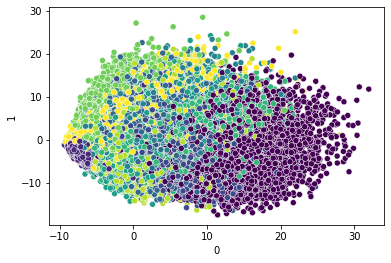

In [10]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

**Уменьшим размерность с помощью t-SNE:**

In [11]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])

c:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


![](data/f17.PNG)

Как видим, алгоритм t-SNE отлично справляется с уменьшением размерности для визуализации, а вот при использовании PCA данные не разделились на кластеры и пересекаются друг с другом — такую визуализацию будет неудобно анализировать.
***

## **ТАБЛИЦА-ОБОБЩЕНИЕ**

В данном юните мы изучили несколько техник уменьшения размерности данных. Эти методы используются для разных целей. Давайте кратко подведём итоги и составим сводную таблицу:

![](data/f18.PNG)